In [462]:
#https://www.kaggle.com/c/nlp-getting-started/data

In [463]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [464]:
test= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/test.csv")
train= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/train.csv")

In [465]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [466]:
train.columns 

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [467]:
train.shape

(7613, 5)

In [468]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [469]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [470]:
np.sum(train.isnull().any(axis=1))

2533

In [471]:
np.sum(train.isna().any(axis=1))

2533

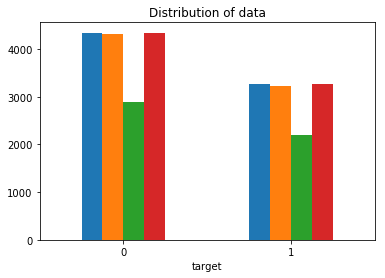

In [472]:
# Plotting the distribution for dataset.
ax = train.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)
# Storing data in lists.
text, sentiment = list(train['text']), list(train['target'])

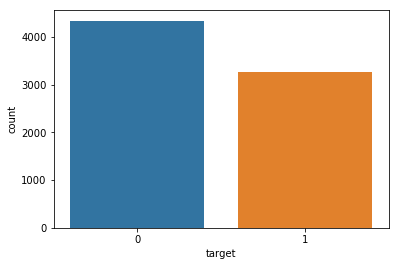

In [473]:
import seaborn as sns
sns.countplot(x='target', data=train)

In [474]:
def data_processing(data) :
    data = data.dropna(axis=0)
    data.fillna(0, inplace=True)
    data['location']=data['location'].fillna('')
    data['keyword']=data['keyword'].fillna('')
    data['text']=data['text'].str.lower()
    return data

In [475]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [476]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words]);
    #data['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
    #data['text'].head()

In [477]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(data):
    translator = str.maketrans('', '', punctuations_list)
    return data.translate(translator)
    #data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
    #data['text'].tail()

In [478]:
def cleaning_repeating_char(data):
    return re.sub(r'(.)1+', r'1', data);
    #data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
    #data['text'].tail()

In [479]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data);
    #data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
    #data['text'].tail()

In [480]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [481]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
def tokenize(data) :
    data['text'] = data['text'].apply(tokenizer.tokenize)
    return data;

In [482]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [483]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [484]:
X=train.text
y=train.target

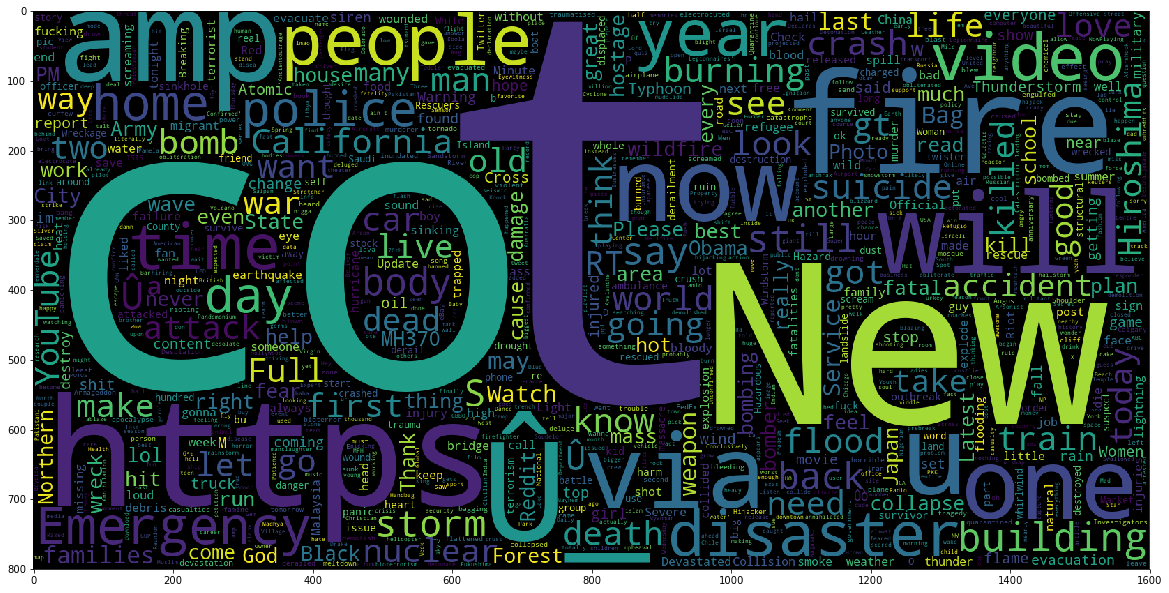

In [485]:
data_neg = train['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

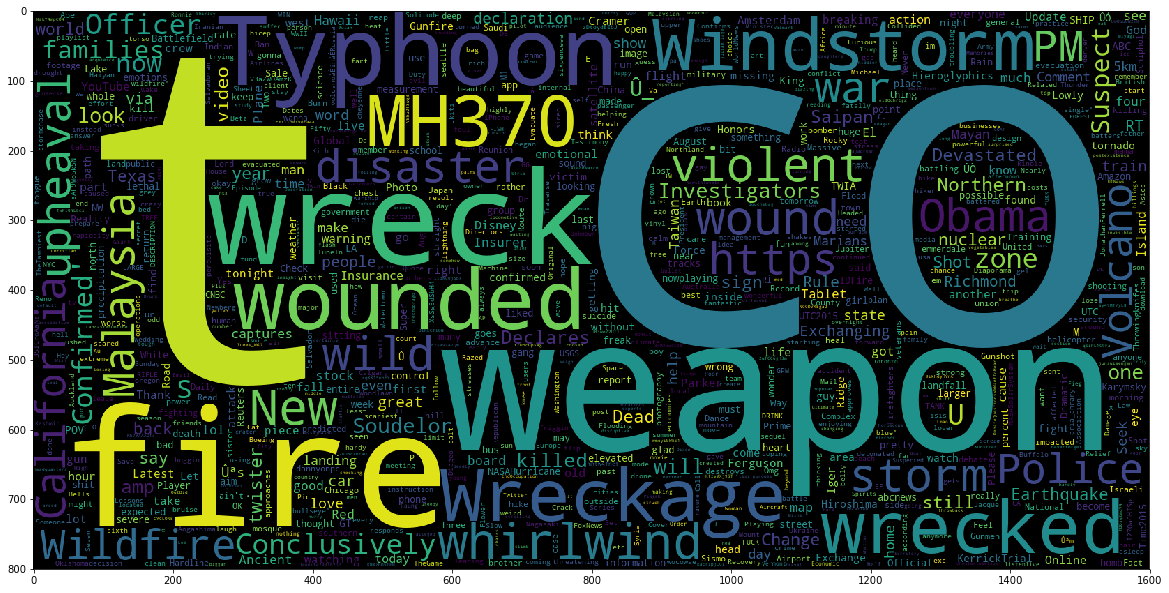

In [486]:
data_pos = train['text'][7000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [487]:
def process_final_data(data):
    data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
    data['text'] = data['text'].apply(lambda x: cleaning_punctuations(x))
    data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
    data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
    data['text'].apply(lambda x: cleaning_numbers(x))
    #tokenizer = RegexpTokenizer(r'w+')
    #data['text'] = data['text'].apply(tokenizer.tokenize)
    data['text'] = data['text'].apply(lambda x: stemming_on_text(x))
    data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
    return data;

In [488]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [489]:
train = process_final_data(train)

In [490]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1


In [491]:
x_train, x_test, y_train, y_test = train_test_split(train['text'], train['target'], test_size=0.25, random_state=0)

In [492]:
x_train

5244    Refugio oil spill may costlier bigger projecte...
4860    Julian Knight  SCVSupremeCourt dismisses mass ...
6538    Electricity cant stop scofield Nigga survived ...
5175    Meek Mill Begging Nicki Minaj To Let Him Oblit...
5820    ChinaÛªs stock market crash summer sparked in...
361     VICTORINOX SWISS ARMY DATE WOMENS RUBBER MOP W...
4801    Its 230 morningampI went downstairs watch tell...
895                  Bloody insomnia again Grrrr Insomnia
1778    The Next Financial Crash ÛÏThe Writing WallÛ...
806     anellatulip put taint magisters open gates let...
3379    Updated RockyFire map Mandatory Evacuation are...
3124    pakistannews NANKANA SAHIB City News Electrocu...
4320    Hellfire We donÛªt even want think mention le...
5246    California Spring Oil Spill Estimate Grows  TH...
5990    I come downstairs trying look normal possible ...
4442    mylittlepwnies3 EarlyMay AnathemaZhiv TonySand...
1662    xDescry I wrong call trusty actually consideri...
6228          

In [493]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  61717


In [494]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

In [495]:
import matplotlib.pyplot as plt

In [496]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(x_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [{v1, v2} for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [497]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

             precision    recall  f1-score   support

          0       0.71      0.98      0.82      1107
          1       0.94      0.44      0.60       797

avg / total       0.81      0.75      0.73      1904



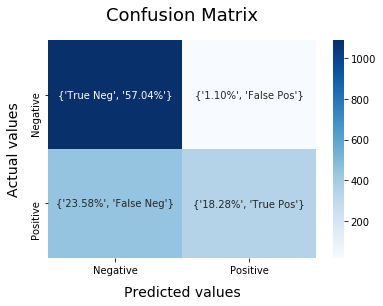

In [498]:
model_Evaluate(BNBmodel)

In [499]:
y_pred1 = BNBmodel.predict(x_test)

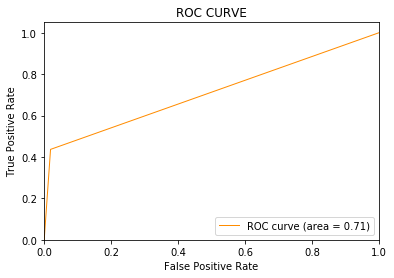

In [500]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

          0       0.80      0.87      0.83      1107
          1       0.79      0.71      0.75       797

avg / total       0.80      0.80      0.80      1904



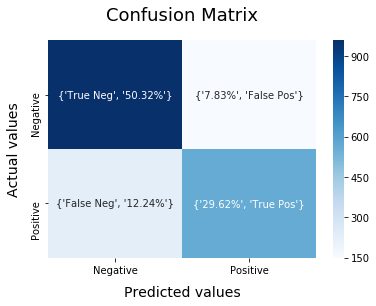

In [502]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

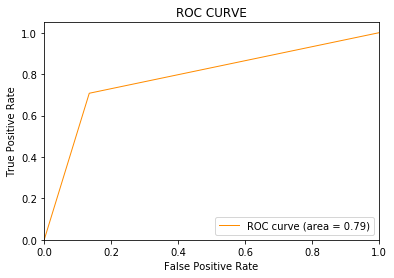

In [503]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/Users/gauravtyagi/opt/anaconda3/envs/Dev/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


             precision    recall  f1-score   support

          0       0.79      0.89      0.84      1107
          1       0.82      0.68      0.74       797

avg / total       0.80      0.80      0.80      1904



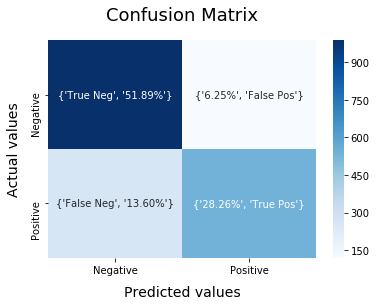

In [504]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)

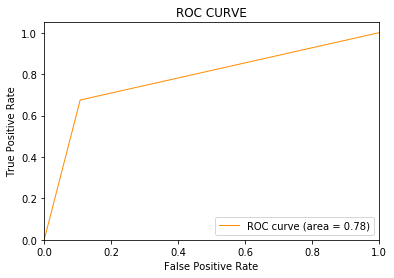

In [505]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()